# Problem Statement - Part I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

- Also, determine the optimal value of lambda for ridge and lasso regression.

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

%matplotlib inline

In [177]:
# Reading the datset
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
housing.shape

(1460, 81)

In [179]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## EDA and Data Visualization

In [180]:
# Check for most correlated features to dependent variable Saleprice
corr_with_price = pd.DataFrame(np.abs(housing.corr()['SalePrice'].sort_values(ascending=False)))
corr_with_price

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


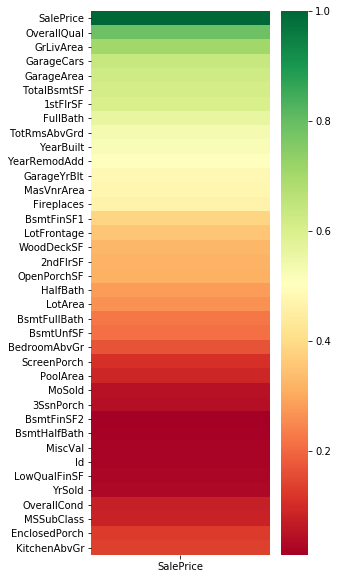

In [181]:
# Correlation heat map of all features with SalePrice
plt.figure(figsize=(4,10))
sns.heatmap(corr_with_price,cmap='RdYlGn')

In [182]:
# Top 15 numerical correlated features with SalePrice
top_corr_features = corr_with_price.iloc[1:16,:].index.tolist()
top_corr_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage']

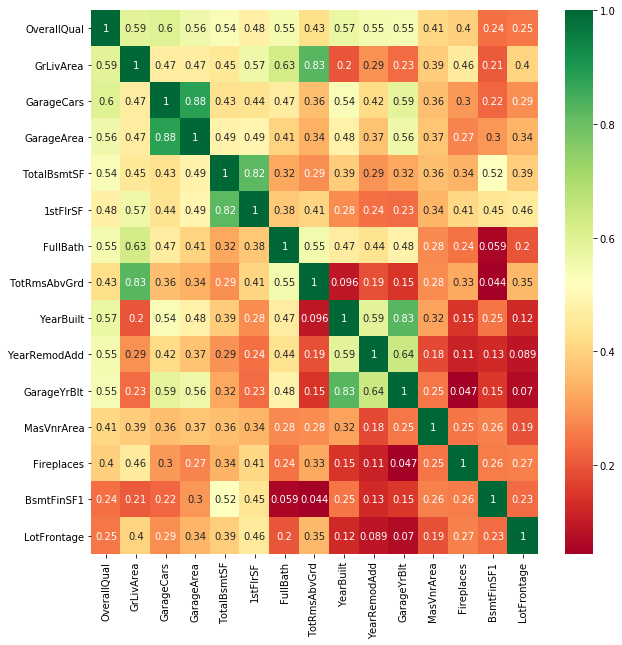

In [183]:
# Correlation between top features
plt.figure(figsize=(10,10))
sns.heatmap(housing[top_corr_features].corr(),annot=True,cmap='RdYlGn')

#### There are features which are highly correlated between themselves and may give rise to multicollinearity issue.
- GrLivArea and TotRmsAbvGrd are highly correlated 
- GarageCars and GarageArea are highly correlated
- TotalBsmtSF and 1stFlrSF are highly correlated
- GarageYrBlt and YearBuilt are highly correlated

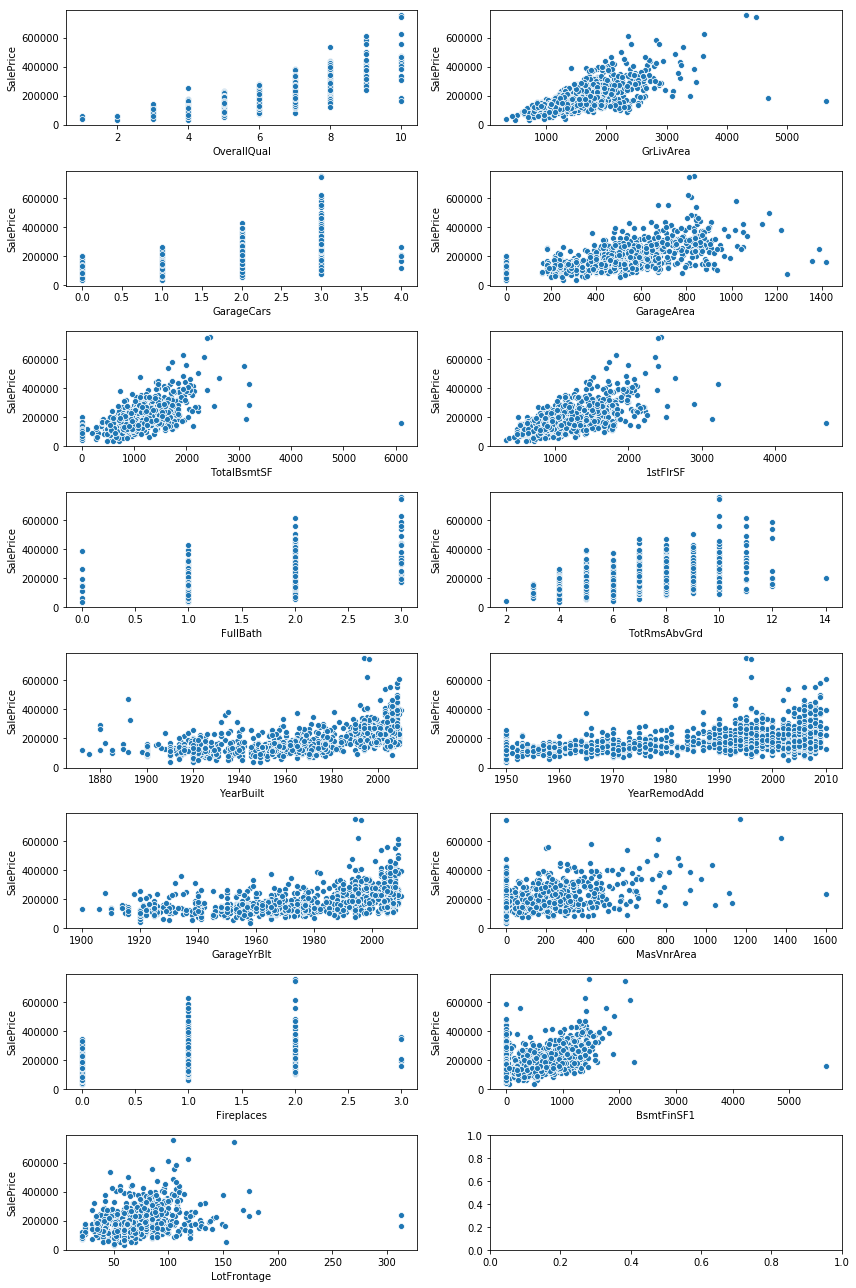

In [184]:
# Lets do a scatterplot of all top correlated features with SalesPrice
%matplotlib inline
fig,ax = plt.subplots(8,2,figsize=(12,18))
ax = ax.flatten()
for axes,col in zip(ax,top_corr_features):
    sns.scatterplot(x=col,y='SalePrice',data=housing,ax=axes)
plt.tight_layout()  


#### Observations:-

- Almost all the features have a positive slope with SalePrice. 
- We can see there are outliers in multiple features which do not follow the existing trend . They need to be handled later.

In [185]:
# Get the categorical columns
cat_cols = housing.select_dtypes(include='object').columns.tolist()
len(cat_cols)

43

In [186]:
#Get the numerical columns
num_cols = housing.select_dtypes(exclude='object').columns.tolist()
len(num_cols)

38

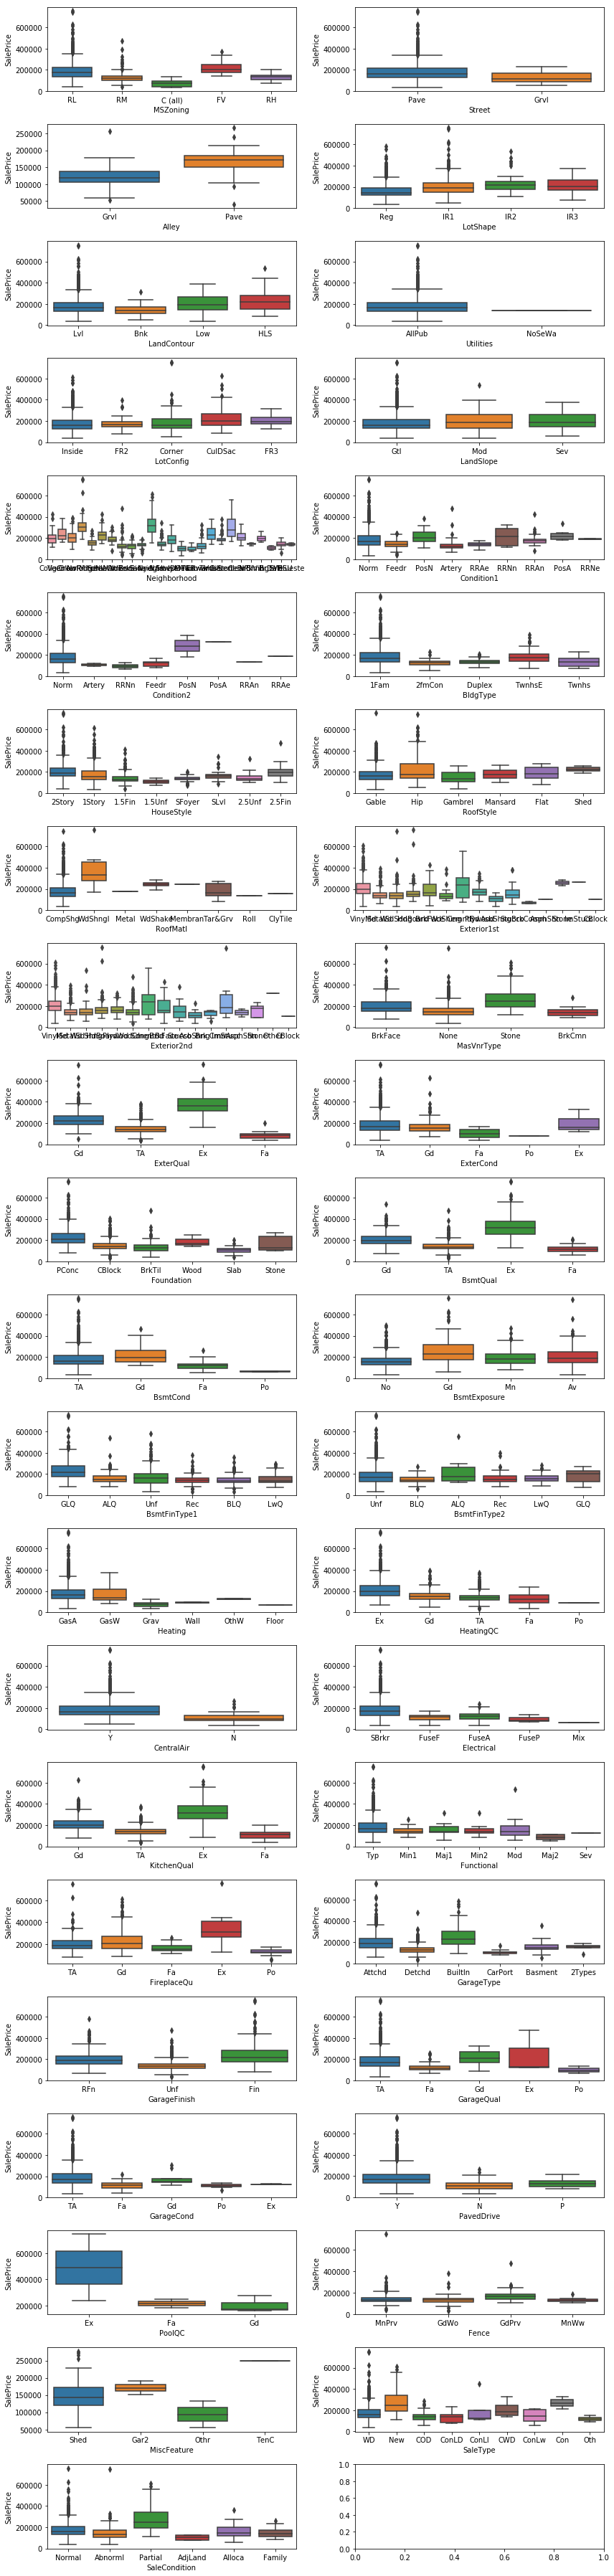

In [190]:
# Visualize the categorical columns
fig,ax = plt.subplots(22,2,figsize=(12,50))
ax = ax.flatten()
for axes,col in zip(ax,cat_cols):
    sns.boxplot(x=housing[col],y=housing['SalePrice'],ax=axes)
plt.tight_layout()

##### Observations:-
- There are lot of variables related to quality of items within the house. They range from Excellent to poor. Better quality has higher price
- Some Neighbourhoods have houses with higher median price
- New Saletype associated with higher price
- Type of material used for different items also affects SalePrice

### Missing Value Treatment

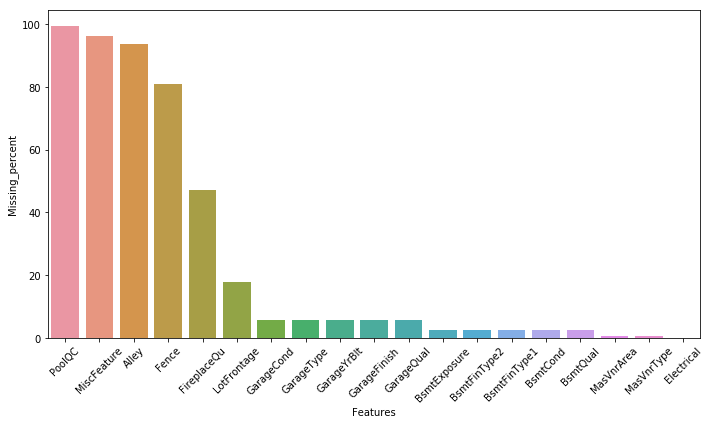

In [101]:
# Check for percent of missing values in each column
missing = pd.DataFrame(round(100*housing.isnull().sum()/len(housing),2).sort_values(ascending=False))
missing.reset_index(inplace=True)
missing.columns = ['Features','Missing_percent']
missing = missing[missing.Missing_percent > 0]
plt.figure(figsize=(10,6))
sns.barplot(x='Features',y='Missing_percent',data=missing)
plt.xticks(rotation=45)
plt.tight_layout()

In [102]:
# Imputation of missing values as per data dictionary
housing.PoolQC = housing['PoolQC'].fillna('No Pool')
housing.MiscFeature = housing['MiscFeature'].fillna('None')
housing.Alley = housing['Alley'].fillna('No Alley')
housing.Fence = housing['Fence'].fillna('No Fence')
housing.FireplaceQu = housing['FireplaceQu'].fillna('No Fireplace')

In [103]:
# Missing value Imputation of all Garage columns
for col in 'GarageCond GarageType GarageFinish GarageQual GarageYrBlt'.split():
    housing[col] = housing[col].fillna('No Garage')

In [104]:
# Missing value Imputation of all basement columns
for col in 'BsmtFinType2 BsmtExposure BsmtCond BsmtFinType1 BsmtQual'.split():
    housing[col] = housing[col].fillna('No Basement')

In [105]:
# Checking for top correlated variable with LotFrontage
np.abs(housing.corr()['LotFrontage'].sort_values(ascending=False)).head()

LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
Name: LotFrontage, dtype: float64

In [106]:
# None of the variables have more than 0.5 correlation with Lotfrontage using which we could have imputed.
# Hence dropping the column as imputing it may add bias to the model
housing = housing.drop('LotFrontage',1)

In [107]:
# Dropping rows for rest of missing values as number of rows are less(4 rows)
housing = housing.dropna()

In [108]:
# Percent of row retained post Missing value treatment
round(100*len(housing)/1460,2)

99.38

In [109]:
# Check for percent of missing values in each column post treatment
missing = pd.DataFrame(round(100*housing.isnull().sum()/len(housing),2).sort_values(ascending=False))
missing.reset_index(inplace=True)
missing.columns = ['Features','Missing_percent']
missing = missing[missing.Missing_percent > 0]
missing.head()

,Features,Missing_percent


In [110]:
#Assigning values to ordinal categorical variables to reduce number of features created during dummy categorical creation
housing = housing.replace({'ExterQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'ExterCond':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'BsmtQual':{'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'BsmtCond':{'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'BsmtExposure':{'No Basement':0,'No':1,'Mn':2,'TA':3,'Av':4,'Gd':5},
                 'BsmtFinType1':{'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
                 'HeatingQC':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'CentralAir':{'N':0,'Y':1},
                 'KitchenQual':{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'FireplaceQu':{'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'GarageFinish':{'No Garage':0,'Unf':1,'RFn':2,'Fin':3},
                 'GarageQual':{'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'GarageCond':{'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
                 'PoolQC':{'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
                 'Fence':{'No Fence':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}})

In [111]:
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,Unf,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,5,5,978,Unf,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,Unf,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,Unf,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,Unf,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,2008,WD,Normal,250000


In [112]:
# Since now we have lot of character cols converted to integers. Lets check correlation with Sales price again
corr_with_price = pd.DataFrame(np.abs(housing.corr()['SalePrice'].sort_values(ascending=False)))
corr_with_price.head(20)

,SalePrice
SalePrice,1.000000
OverallQual,0.790085
GrLivArea,0.710073
ExterQual,0.681200
KitchenQual,0.658647
GarageCars,0.639749
GarageArea,0.622484
TotalBsmtSF,0.613299
1stFlrSF,0.606969
BsmtQual,0.584317


**we can see features like `ExterQual, KitchenQual, BsmtQual, FireplaceQu` are highly correlated to SalePrice**

### Outlier Treatment

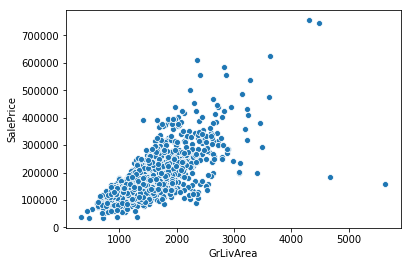

In [113]:
# During our EDA we saw presence of outliers. we will treat the most prominent ones ecspecially the ones highly correlated
# with SalePrice
sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

In [114]:
# There are two points which do not follow the normal linear trend. We will drop those 2 houses
housing[housing.GrLivArea > 4000][['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


In [115]:
# we will drop GrLivArea greater than 4676
print(f"Rows before removing outliers :{housing.shape[0]}")
housing = housing[housing.GrLivArea < 4676]
print(f"Rows after removing outliers :{housing.shape[0]}")

Rows before removing outliers :1451
Rows after removing outliers :1449


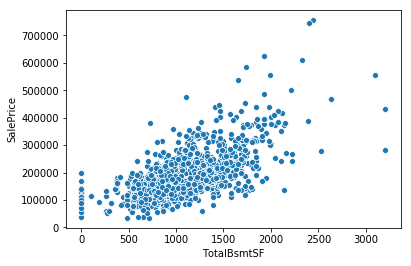

In [116]:
# All good now. The outlier earlier seen was removed during treatment of GrLivArea
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

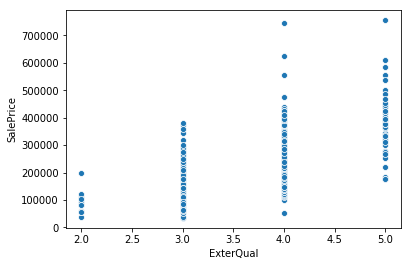

In [117]:
#All good here
sns.scatterplot(x='ExterQual',y='SalePrice',data=housing)

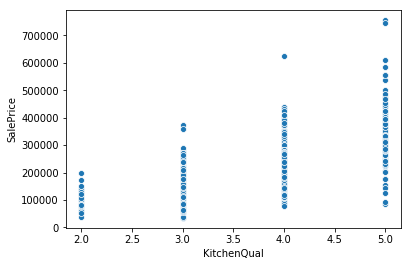

In [118]:
#All good here
sns.scatterplot(x='KitchenQual',y='SalePrice',data=housing)

<Figure size 576x576 with 0 Axes>

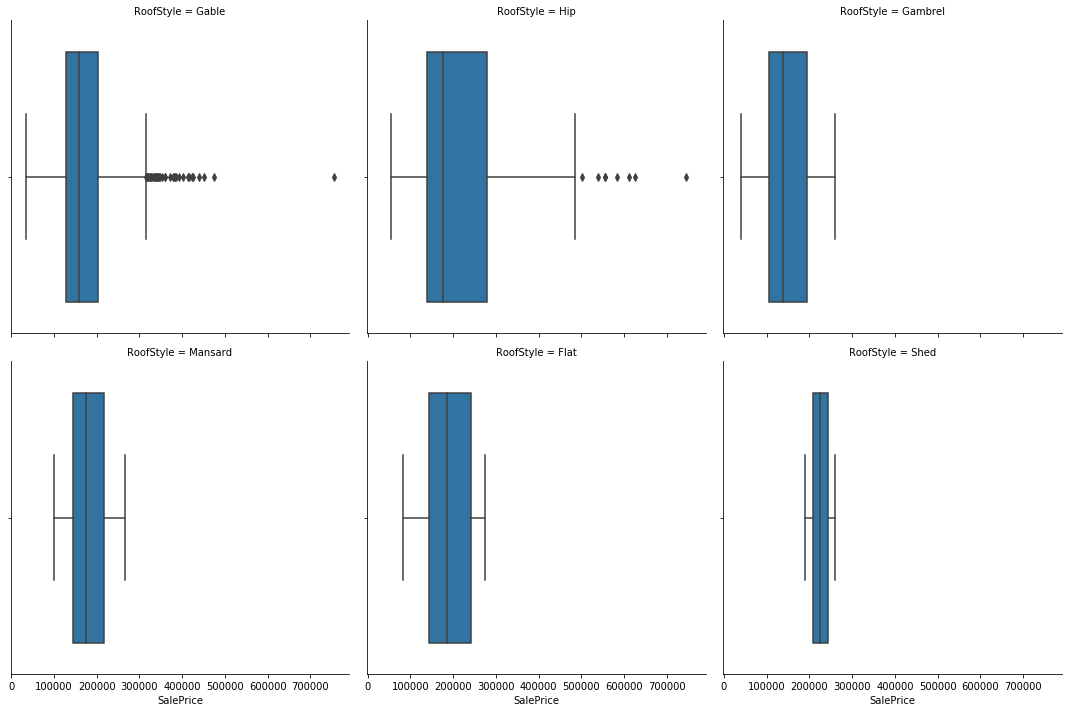

In [119]:
# Roof Style = Gable has an outlier. We will remove that.
plt.figure(figsize=(8,8))
sns.catplot(x='SalePrice',col='RoofStyle',data=housing,kind='box',col_wrap=3)
plt.tight_layout()

In [120]:
print(f"Rows before removing outliers :{housing.shape[0]}")
housing = housing[~((housing.RoofStyle=='Gable') & (housing.SalePrice > 700000))]
print(f"Rows after removing outliers :{housing.shape[0]}")

Rows before removing outliers :1449
Rows after removing outliers :1448


In [121]:
# Percent of row retained post Outlier and Missing value treatment
round(100*len(housing)/1460,2)

99.18

In [122]:
cat_cols = housing.select_dtypes(include='object').columns.tolist()
num_cols = housing.select_dtypes(exclude='object').columns.tolist()

In [123]:
# We will calculate age of the property from the year columns and then drop the year columns
# YrSold: Year Sold (YYYY)
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# GarageYrBlt: Year garage was built
housing['Age'] = housing.YrSold - housing[['YearBuilt','YearRemodAdd','GarageYrBlt']].max(axis=1) 
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,Unf,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,208500,5
1,2,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,5,5,978,Unf,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,181500,31
2,3,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,Unf,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,223500,6
3,4,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,Unf,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,140000,36
4,5,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,Unf,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,250000,8


In [124]:
# Check number of unique values for all columns
housing.nunique().sort_values(ascending=False)

Id               1448
LotArea          1063
GrLivArea         855
BsmtUnfSF         776
1stFlrSF          745
TotalBsmtSF       714
SalePrice         655
BsmtFinSF1        630
GarageArea        436
2ndFlrSF          411
MasVnrArea        324
WoodDeckSF        274
OpenPorchSF       199
BsmtFinSF2        144
EnclosedPorch     119
ScreenPorch        76
Age                61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
SaleType            9
OverallCond         9
Condition1          9
                 ... 
LotConfig           5
MSZoning            5
ExterCond           5
BsmtExposure        5
BsmtQual            5
Fence               5
Electrical          5
HeatingQC           5
GarageCars          5
MiscFeature         5
BsmtCond            5
MasVnrType          4
PoolQC              4
LotShape            4
BsmtFullBa

In [125]:
# Id column has all unique values hence does not add value to our modelling hence dropping it.
housing = housing.drop('Id',1)
housing.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,Unf,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,WD,Normal,208500,5
1,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,5,5,978,Unf,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,WD,Normal,181500,31
2,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,Unf,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,WD,Normal,223500,6
3,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,Unf,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,WD,Abnorml,140000,36
4,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,Unf,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,WD,Normal,250000,8


In [126]:
cat_cols = housing.select_dtypes(include='object').columns.tolist()
num_cols = housing.select_dtypes(exclude='object').columns.tolist()

### Drop Highly skewed features

In [127]:
# List of numerical features with high skew data (> 0.5)
high_skew_features = np.abs(housing[num_cols].skew())[np.abs(housing[num_cols].skew()) > 0.5].index.tolist()
high_skew_features

['MSSubClass',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'SalePrice']

In [128]:
# We will compile a list which shows max percentage of a single value within that feature.
frequent_data = pd.DataFrame(columns=['feature','mostfrequentvalue','percentage'])
for col in high_skew_features:
    temp = pd.DataFrame(100*housing[col].value_counts()/len(housing[col])).head(1)
    temp['feature'] = temp.columns
    temp = temp.reset_index()
    temp.columns = ['mostfrequentvalue','percentage','feature']
    temp = temp[['feature','mostfrequentvalue','percentage']]
    frequent_data = pd.concat([frequent_data,temp])
    
frequent_data.sort_values('percentage',ascending=False)

,feature,mostfrequentvalue,percentage
0,PoolQC,0,99.585635
0,PoolArea,0,99.585635
0,3SsnPorch,0,98.342541
0,LowQualFinSF,0,98.204420
0,MiscVal,0,96.408840
0,KitchenAbvGr,1,95.372928
0,BsmtHalfBath,0,94.406077
0,CentralAir,1,93.439227
0,ScreenPorch,0,91.988950
0,GarageCond,3,90.745856


In [129]:
# We will use the above list to drop data which have same data in 90% of the feature very less predictive power.
to_be_dropped = frequent_data[frequent_data.percentage > 90]['feature'].tolist()
to_be_dropped

['CentralAir',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'GarageCond',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal']

In [130]:
# Dropping all above features
housing = housing.drop(to_be_dropped,1)
housing.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,Unf,0,150,856,GasA,5,SBrkr,856,854,1710,1,2,1,3,4,8,Typ,0,0,Attchd,2,2,548,3,Y,0,61,0,0,None,2,WD,Normal,208500,5
1,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,5,5,978,Unf,0,284,1262,GasA,5,SBrkr,1262,0,1262,0,2,0,3,3,6,Typ,1,3,Attchd,2,2,460,3,Y,298,0,0,0,None,5,WD,Normal,181500,31
2,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,Unf,0,434,920,GasA,5,SBrkr,920,866,1786,1,2,1,3,4,6,Typ,1,3,Attchd,2,2,608,3,Y,0,42,0,0,None,9,WD,Normal,223500,6
3,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,Unf,0,540,756,GasA,4,SBrkr,961,756,1717,1,1,0,3,4,7,Typ,1,4,Detchd,1,3,642,3,Y,0,35,272,0,None,2,WD,Abnorml,140000,36
4,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,Unf,0,490,1145,GasA,5,SBrkr,1145,1053,2198,1,2,1,4,4,9,Typ,1,3,Attchd,2,3,836,3,Y,192,84,0,0,None,12,WD,Normal,250000,8


In [131]:
# We will compile a list which shows max percentage of a single value within all categorical feature.
frequent_cat_data = pd.DataFrame(columns=['feature','mostfrequentvalue','percentage'])
for col in cat_cols:
    temp = pd.DataFrame(100*housing[col].value_counts()/len(housing[col])).head(1)
    temp['feature'] = temp.columns
    temp = temp.reset_index()
    temp.columns = ['mostfrequentvalue','percentage','feature']
    temp = temp[['feature','mostfrequentvalue','percentage']]
    frequent_cat_data = pd.concat([frequent_cat_data,temp])
    
frequent_cat_data.sort_values('percentage',ascending=False)

,feature,mostfrequentvalue,percentage
0,Utilities,AllPub,99.930939
0,Street,Pave,99.585635
0,Condition2,Norm,99.033149
0,RoofMatl,CompShg,98.342541
0,Heating,GasA,97.790055
0,MiscFeature,None,96.270718
0,LandSlope,Gtl,94.613260
0,Alley,No Alley,93.784530
0,Functional,Typ,93.162983
0,PavedDrive,Y,91.712707


In [132]:
# We will use the above list to drop data which have same data in 90% of the feature very less predictive power.
cat_to_be_dropped = frequent_cat_data[frequent_cat_data.percentage > 90]['feature'].tolist()
cat_to_be_dropped

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'Electrical',
 'Functional',
 'PavedDrive',
 'MiscFeature']

In [133]:
# Dropping all above features
housing = housing.drop(cat_to_be_dropped,1)
housing.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,Unf,0,150,856,5,856,854,1710,1,2,1,3,4,8,0,0,Attchd,2,2,548,3,0,61,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,5,5,978,Unf,0,284,1262,5,1262,0,1262,0,2,0,3,3,6,1,3,Attchd,2,2,460,3,298,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,Unf,0,434,920,5,920,866,1786,1,2,1,3,4,6,1,3,Attchd,2,2,608,3,0,42,0,0,9,WD,Normal,223500,6
3,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,Unf,0,540,756,4,961,756,1717,1,1,0,3,4,7,1,4,Detchd,1,3,642,3,0,35,272,0,2,WD,Abnorml,140000,36
4,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,Unf,0,490,1145,5,1145,1053,2198,1,2,1,4,4,9,1,3,Attchd,2,3,836,3,192,84,0,0,12,WD,Normal,250000,8


In [134]:
# After dropping all high skewed columns 
housing.shape

(1448, 55)

#### Check Normality of Dependent variable

In [135]:
# Assumption of Linear regression needs normality of predictors and dependent variables.
# Checking for skew in dependent variable
housing['SalePrice'].skew()

1.726183044261896

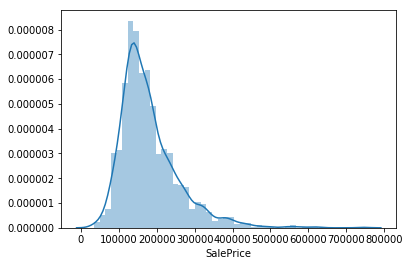

In [136]:
# Distribution shows data is positively skewed
sns.distplot(housing['SalePrice'])                  

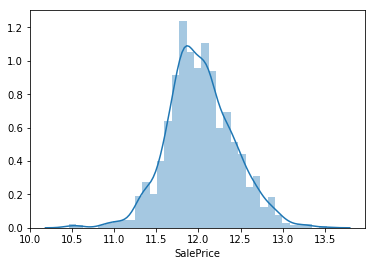

In [137]:
#we will apply log transformation and verify the data
housing.SalePrice = np.log(housing.SalePrice)
sns.distplot((housing['SalePrice']))

**`Data Looks normal now`**

In [138]:
# Get the numeric columns apart from dependent variable
num_cols = housing.select_dtypes(exclude='object').columns.difference(['SalePrice'])
num_cols

Index(['1stFlrSF', '2ndFlrSF', 'Age', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Fence', 'FireplaceQu', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageFinish', 'GarageQual', 'GrLivArea',
       'HalfBath', 'HeatingQC', 'KitchenQual', 'LotArea', 'MSSubClass',
       'MasVnrArea', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

In [139]:
housing.shape

(1448, 55)

##### Encoding categorical variables

In [140]:
# Encoding all categorical variables
housing = pd.get_dummies(housing,drop_first=True)
housing.shape

(1448, 162)

In [141]:
housing.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,4,3,4,3,1,6,706,0,150,856,5,856,854,1710,1,2,1,3,4,8,0,0,2,2,548,3,0,61,0,0,2,12.247694,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,3,3,4,3,5,5,978,0,284,1262,5,1262,0,1262,0,2,0,3,3,6,1,3,2,2,460,3,298,0,0,0,5,12.109011,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,4,3,4,3,2,6,486,0,434,920,5,920,866,1786,1,2,1,3,4,6,1,3,2,2,608,3,0,42,0,0,9,12.317167,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,3,3,3,4,1,5,216,0,540,756,4,961,756,1717,1,1,0,3,4,7,1,4,1,3,642,3,0,35,272,0,2,11.849398,36,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Train test splitting

In [142]:
# Separating predictors and dependent variables
X = housing.drop('SalePrice',axis=1)
y = housing.SalePrice

In [143]:
X.shape

(1448, 161)

In [144]:
y.shape

(1448,)

In [145]:
# Splitting train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1158, 161)
(290, 161)
(1158,)
(290,)


In [146]:
# Scaling the numeric columns 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Applying on test set
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
993,0.073124,-0.153703,-0.064919,-0.532557,-0.560682,-0.700022,-0.271485,0.577405,0.112063,-0.592510,-1.209343,-1.006437,-0.278368,0.395601,-0.729671,0.870331,-1.104332,0.940497,-0.019764,-0.806447,0.810212,1.248300,0.183808,0.735831,-0.311354,-0.958537,-1.012785,0.329918,0.314457,0.431357,0.274641,-0.754042,-0.163322,-0.370663,-0.468939,0.653441,-1.106062,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
48,3.200417,-0.569526,-1.524642,-0.532557,-0.560682,-0.700022,-0.271485,-0.563611,0.112063,-0.592510,-1.209343,-1.006437,-0.278368,0.364056,-0.763219,-0.182797,-1.142017,0.861916,-0.114699,-0.806447,0.810212,-0.756598,-1.039468,-0.796709,0.917088,-0.958537,-1.012785,-1.924032,-2.363052,-2.195053,-3.855677,-0.754042,-0.689633,1.245237,-0.468939,-0.085870,-1.057388,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
426,0.554246,0.220822,0.664943,-0.532557,0.248756,1.077666,-0.271485,0.577405,0.112063,2.141062,1.153038,2.494520,-0.278368,-1.294286,1.110697,-0.1827

### Ridge Regularization

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge Regressor
ridge = Ridge()

# Specify number of folds in KFold crossvalidation
folds = 5
params = {'alpha':[0.001,0.01,0.1,1,10,30,50,80,100]}

cv_model_ridge = GridSearchCV(estimator=ridge,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_absolute_error', \
                        return_train_score=True)
cv_model_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 30, 50, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [148]:
cv_results = pd.DataFrame(cv_model_ridge.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008576,0.001850,0.001197,0.000400,0.001,{'alpha': 0.001},-0.087247,-0.077613,-0.099997,-0.084668,-0.093725,-0.088649,0.007674,9,-0.068687,-0.072527,-0.065532,-0.071407,-0.068728,-0.069376,0.002438
1,0.009378,0.002488,0.002192,0.001467,0.01,{'alpha': 0.01},-0.087299,-0.077623,-0.099935,-0.084605,-0.093542,-0.088600,0.007634,8,-0.068691,-0.072539,-0.065558,-0.071415,-0.068734,-0.069387,0.002434
2,0.007780,0.000978,0.001595,0.000490,0.1,{'alpha': 0.1},-0.087490,-0.077705,-0.099424,-0.083972,-0.092429,-0.088204,0.007385,7,-0.068791,-0.072640,-0.065780,-0.071537,-0.068815,-0.069513,0.002401
3,0.007779,0.001466,0.001398,0.000487,1,{'alpha': 1},-0.086895,-0.079023,-0.097501,-0.080800,-0.089109,-0.086669,0.006579,4,-0.070019,-0.073342,-0.066947,-0.072720,-0.069925,-0.070590,0.002287
4,0.005791,0.002614,0.001396,0.000798,10,{'alpha': 10},-0.085904,-0.081648,-0.095211,-0.077458,-0.084164,-0.084884,0.005897,1,-0.073572,-0.075997,-0.071057,-0.076526,-0.073521,-0.074135,0.001967
5,0.008030,0.007891,0.000808,0.000749,30,{'alpha': 30},-0.086740,-0.082984,-0.096241,-0.076773,-0.084317,-0.085419,0.006337,2,-0.076597,-0.078526,-0.074220,-0.079435,-0.076678,-0.077091,0.001801
6,0.008174,0.005192,0.000798,0.000746,50,{'alpha': 50},-0.087342,-0.083393,-0.097407,-0.076746,-0.085221,-0.086031,0.006708,3,-0.078239,-0.079915,-0.075803,-0.081032,-0.078288,-0.078656,0.001771
7,0.005987,0.001093,0.001396,0.000484,80,{'alpha': 80},-0.087812,-0.083661,-0.098749,-0.076807,-0.086325,-0.086680,0.007123,5,-0.079953,-0.081409,-0.077337,-0.082647,-0.079883,-0.080246,0.001778
8,0.005987,0.000633,0.001194,0.000401,100,{'alpha': 100},-0.088080,-0.083782,-0.099519,-0.076859,-0.087045,-0.087066,0.007363,6,-0.080783,-0.082206,-0.078120,-0.083511,-0.080663,-0.081057,0.001800


Text(0.5, 1.0, 'Neg_Mean_Absolute_Error vs alpha_values')

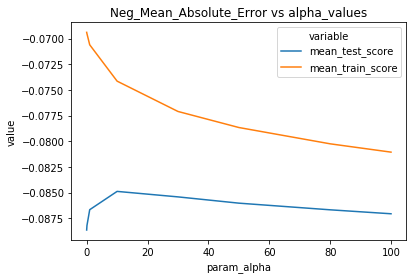

In [149]:
# Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results.melt('param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.title('Neg_Mean_Absolute_Error vs alpha_values')

In [150]:
# The best alpha value from the plot is clearly 10. We can also check the attribute of the cv object
cv_model_ridge.best_params_

{'alpha': 10}

In [151]:
# Finetuning alpha further
params = {'alpha':[3,5,8,10,12,15,18,20]}

cv_model_ridge2 = GridSearchCV(estimator=ridge,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_absolute_error', \
                        return_train_score=True)
cv_model_ridge2.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [3, 5, 8, 10, 12, 15, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [152]:
cv_results2 = pd.DataFrame(cv_model_ridge2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009375,0.002054,0.001596,0.000489,3,{'alpha': 3},-0.086087,-0.080226,-0.096130,-0.078764,-0.086557,-0.085558,0.006128,8,-0.071264,-0.074218,-0.068364,-0.074169,-0.071221,-0.071847,0.002185
1,0.006183,0.001467,0.001396,0.000489,5,{'alpha': 5},-0.085879,-0.080816,-0.095582,-0.078121,-0.085220,-0.085130,0.005961,7,-0.072072,-0.074848,-0.069350,-0.075057,-0.072060,-0.072677,0.002107
2,0.003802,0.003479,0.000598,0.000798,8,{'alpha': 8},-0.085882,-0.081381,-0.095299,-0.077668,-0.084457,-0.084944,0.005900,4,-0.073050,-0.075575,-0.070467,-0.076022,-0.073003,-0.073623,0.002012
3,0.009933,0.007550,0.000400,0.000490,10,{'alpha': 10},-0.085904,-0.081648,-0.095211,-0.077458,-0.084164,-0.084884,0.005897,1,-0.073572,-0.075997,-0.071057,-0.076526,-0.073521,-0.074135,0.001967
4,0.005187,0.002919,0.000996,0.000631,12,{'alpha': 12},-0.085961,-0.081865,-0.095256,-0.077312,-0.083991,-0.084884,0.005934,2,-0.074034,-0.076363,-0.071564,-0.076947,-0.073986,-0.074579,0.001925
5,0.007852,0.006630,0.000199,0.000399,15,{'alpha': 15},-0.086106,-0.082119,-0.095361,-0.077154,-0.083887,-0.084933,0.005995,3,-0.074629,-0.076839,-0.072186,-0.077495,-0.074601,-0.075150,0.001882
6,0.009373,0.007653,0.003124,0.006249,18,{'alpha': 18},-0.086228,-0.082345,-0.095545,-0.077038,-0.083894,-0.085018,0.006073,5,-0.075128,-0.077266,-0.072702,-0.077971,-0.075128,-0.075639,0.001857
7,0.006249,0.007653,0.000000,0.000000,20,{'alpha': 20},-0.086310,-0.082487,-0.095660,-0.076959,-0.083940,-0.085079,0.006123,6,-0.075419,-0.077517,-0.073000,-0.078261,-0.075433,-0.075926,0.001846


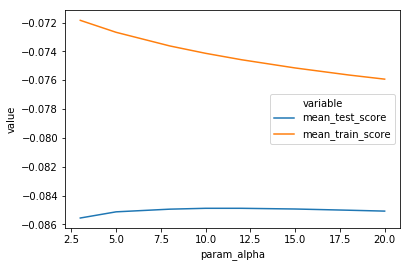

In [153]:
#Plotting the error vs alpha values
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results2.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))

### alpha = 10 is the best hyperparameter for Ridge regression

In [154]:
# Using the best final model to do prediction 
final_ridge = cv_model_ridge2.best_estimator_
final_ridge

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
# Using final ridge to fit our data
final_ridge.fit(X_train,y_train)
final_ridge.coef_

array([-0.02123753,  0.01821551,  0.08266127,  0.0441135 ,  0.00317943,
        0.00047388, -0.00285977,  0.0105483 ,  0.00218894,  0.01307561,
        0.01287953,  0.03231064,  0.00255459,  0.00379307,  0.03856643,
        0.01578004,  0.03122551,  0.041443  ,  0.07358581,  0.01526578,
        0.01287109,  0.01952459,  0.00497042,  0.01348945, -0.00125516,
        0.00663025,  0.01200442,  0.00573345,  0.02577534,  0.01152513,
        0.02013584,  0.01021226,  0.00369858,  0.00278799, -0.00323475,
       -0.00200681, -0.02035977,  0.06492995,  0.02633463,  0.05921444,
        0.00574678,  0.02024183, -0.00074415, -0.00625277,  0.02295558,
       -0.01152005, -0.00833546,  0.01969965, -0.02702368, -0.01650891,
       -0.01335312,  0.00108684, -0.02233927,  0.01478905,  0.0261769 ,
        0.00605932,  0.07695257, -0.0282882 ,  0.00187351, -0.06480775,
       -0.0552002 , -0.01186277, -0.00716481,  0.00420621, -0.01470436,
        0.01463685,  0.05361355, -0.0555506 , -0.03050776, -0.01

In [156]:
# Create a series to hold the coefs
ridge_coefs = pd.Series(final_ridge.coef_ , index=X_train.columns)
ridge_coefs.head()

MSSubClass    -0.021238
LotArea        0.018216
OverallQual    0.082661
OverallCond    0.044114
MasVnrArea     0.003179
dtype: float64

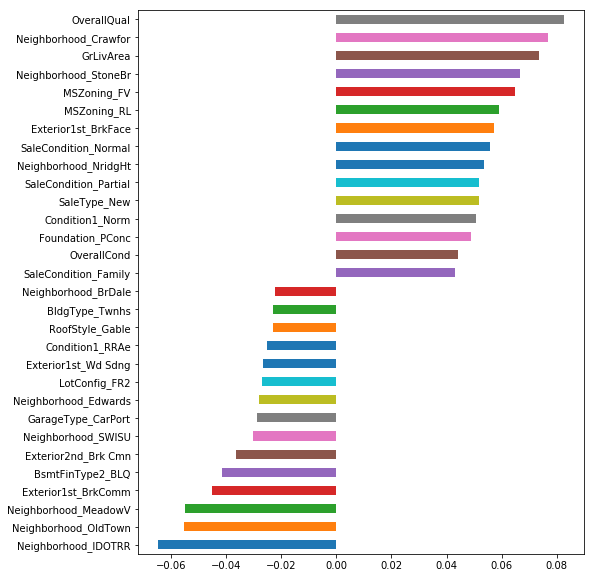

In [157]:
# Plot the top positive and negative coefs
imp_ridge_coefs = pd.concat([ridge_coefs.sort_values().head(15),ridge_coefs.sort_values().tail(15)])
plt.figure(figsize=(8,10))
imp_ridge_coefs.plot(kind='barh')

#### Features which positively affect Price are `OverallQual, GrLivArea, Neighbourhoods('Crawfor,StoneBr'), MSZoning(FV,RL) `

#### Features which negatively affect Price are `Neighbourhoods('IDOTrr,OldTown'), Brick common Exterior,  Below Average Basement Finishing`

In [158]:
# Prediction on the model and check prediction metrics R2 score and Mean absolute error 
from sklearn.metrics import r2_score,mean_absolute_error

y_train_pred =  final_ridge.predict(X_train)
print(f"Test R2 score: {r2_score(y_train,y_train_pred)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_train,y_train_pred)}")
print('\n')
y_test_pred =  final_ridge.predict(X_test)
print(f"Test R2 score: {r2_score(y_test,y_test_pred)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_test,y_test_pred)}")

Test R2 score: 0.9313808553075628
Test mean_absolute_error: 0.0746802685271951


Test R2 score: 0.9012607761972868
Test mean_absolute_error: 0.08796995045185385


In [159]:
# Getting actual Sales value by reversing the log transformation by using antilog
final_saleprice = pd.DataFrame(np.exp(y_test_pred),y_test)
final_saleprice.reset_index(inplace=True)
final_saleprice.columns = ['Log_Sales','Actual_Final_SalePrice']
final_saleprice.head()

,Log_Sales,Actual_Final_SalePrice
0,12.660328,324485.585799
1,12.936752,360461.106681
2,11.872347,142579.523961
3,11.941944,129919.561592
4,12.301383,207445.681821


### Lasso Regularization

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Lasso Regressor
lasso = Lasso()

# Specify number of folds in KFold crossvalidation
folds = 5
params = {'alpha':[0.0001,0.0005,0.0008,0.001,0.01,0.1,1,10,30,50,80,100]}

cv_model_lasso = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_absolute_error', \
                        return_train_score=True)
cv_model_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0005, 0.0008, 0.001, 0.01, 0.1, 1, 10, 30, 50, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [161]:
# Selecting the top 4 models for legible visualization
cv_results = pd.DataFrame(cv_model_lasso.cv_results_)
cv_results = cv_results.nsmallest(4,'rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.037450,0.008869,0.004322,0.005667,0.0005,{'alpha': 0.0005},-0.087939,-0.081754,-0.095811,-0.078225,-0.084202,-0.085593,0.006016,1,-0.075348,-0.077830,-0.073264,-0.078179,-0.075350,-0.075994,0.001813
2,0.031512,0.009430,0.001597,0.000487,0.0008,{'alpha': 0.0008},-0.088225,-0.082364,-0.096436,-0.077568,-0.084235,-0.085774,0.006341,2,-0.077193,-0.079923,-0.075277,-0.080258,-0.077561,-0.078042,0.001846
3,0.017228,0.007600,0.000000,0.000000,0.001,{'alpha': 0.001},-0.088292,-0.082733,-0.096343,-0.077756,-0.084479,-0.085929,0.006216,3,-0.078119,-0.081088,-0.076119,-0.081185,-0.078494,-0.079001,0.001922
0,0.060693,0.014274,0.001596,0.000798,0.0001,{'alpha': 0.0001},-0.087556,-0.078577,-0.096991,-0.080116,-0.088262,-0.086304,0.006600,4,-0.070069,-0.073506,-0.067422,-0.072913,-0.070280,-0.070838,0.002191


Text(0.5, 1.0, 'Neg_Mean_Absolute_Error vs alpha_values')

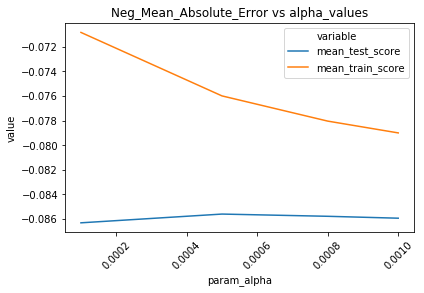

In [162]:
# Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Neg_Mean_Absolute_Error vs alpha_values')

In [163]:
# The best alpha value from the plot is clearly 0.0005. We can also check the attribute of the cv object
cv_model_lasso.best_params_

{'alpha': 0.0005}

In [164]:
# Finetuning alpha further
folds=5
params = {'alpha':[0.0002,0.0003,0.0005,0.0006,0.0007,0.0009]}

cv_model_lasso2 = GridSearchCV(estimator=lasso,param_grid=params,cv=folds,verbose=True,scoring='neg_mean_absolute_error', \
                        return_train_score=True)
cv_model_lasso2.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0002, 0.0003, 0.0005, 0.0006, 0.0007, 0.0009]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=True)

In [165]:
cv_results2 = pd.DataFrame(cv_model_lasso2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037626,0.010858,0.000200,3.991127e-04,0.0002,{'alpha': 0.0002},-0.087833,-0.080344,-0.096703,-0.079105,-0.086255,-0.086054,0.006287,6,-0.071551,-0.074956,-0.069296,-0.074594,-0.072067,-0.072493,0.002086
1,0.041509,0.017594,0.001796,3.990931e-04,0.0003,{'alpha': 0.0003},-0.088058,-0.081129,-0.095433,-0.078998,-0.085609,-0.085852,0.005763,5,-0.072801,-0.076017,-0.070930,-0.076057,-0.073630,-0.073887,0.001961
2,0.028922,0.007802,0.001197,3.988028e-04,0.0005,{'alpha': 0.0005},-0.087939,-0.081754,-0.095811,-0.078225,-0.084202,-0.085593,0.006016,2,-0.075348,-0.077830,-0.073264,-0.078179,-0.075350,-0.075994,0.001813
3,0.025930,0.007302,0.000998,3.568323e-07,0.0006,{'alpha': 0.0006},-0.087951,-0.081970,-0.096004,-0.077868,-0.083826,-0.085532,0.006163,1,-0.076085,-0.078626,-0.074095,-0.079087,-0.076196,-0.076818,0.001831
4,0.023933,0.006676,0.001197,3.997565e-04,0.0007,{'alpha': 0.0007},-0.088104,-0.082206,-0.096240,-0.077631,-0.083978,-0.085640,0.006280,3,-0.076626,-0.079305,-0.074718,-0.079684,-0.076891,-0.077445,0.001838
5,0.021942,0.005950,0.001595,4.876728e-04,0.0009,{'alpha': 0.0009},-0.088221,-0.082566,-0.096388,-0.077600,-0.084320,-0.085827,0.006291,4,-0.077706,-0.080575,-0.075692,-0.080790,-0.078088,-0.078570,0.001908


Text(0.5, 1.0, 'Neg_Mean_Absolute_Error vs alpha_values')

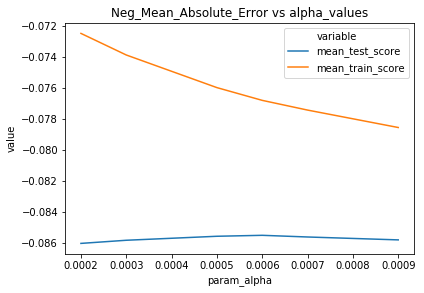

In [166]:
# Plotting the error values vs the alpha parameter
plt.figure()
sns.lineplot(x='param_alpha',y='value',hue='variable',data=cv_results2.melt(id_vars='param_alpha',value_vars=['mean_test_score','mean_train_score']))
plt.tight_layout()
plt.title('Neg_Mean_Absolute_Error vs alpha_values')

In [167]:
# The best alpha value from the plot is clearly 0.0006. We can also check the attribute of the cv object
cv_model_lasso2.best_params_

{'alpha': 0.0006}

### alpha = 0.0006 is the best hyperparameter for Lasso regression

In [168]:
# Using the best final model to do prediction 
final_lasso = cv_model_lasso2.best_estimator_
final_lasso

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
# Using final lasso to fit our data
final_lasso.fit(X_train,y_train)
final_lasso.coef_

array([-0.02121186,  0.01729965,  0.0883729 ,  0.04327815,  0.00441381,
        0.00266109, -0.00116262,  0.00848409, -0.        ,  0.0149996 ,
        0.01073474,  0.02955958,  0.        , -0.        ,  0.0393273 ,
        0.01636469,  0.        ,  0.00047039,  0.1191528 ,  0.01513596,
        0.01244342,  0.01676268,  0.00209295,  0.01285198, -0.        ,
        0.00706126,  0.01064501,  0.00596151,  0.02784682,  0.00943005,
        0.01358936,  0.01024774,  0.00316   ,  0.00056335, -0.00314429,
       -0.00054179, -0.02083982,  0.07379055,  0.        ,  0.05273026,
       -0.        ,  0.00670211,  0.        , -0.00858848,  0.00570967,
       -0.        , -0.00349845,  0.02184002, -0.00169514, -0.        ,
       -0.00800724,  0.        , -0.        ,  0.00228114,  0.01385089,
        0.        ,  0.07999977, -0.01606649,  0.        , -0.06257711,
       -0.01861682, -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.04429293, -0.06137175, -0.02058634, -0.00

In [170]:
# Create a series to hold the coefs
lasso_coefs = pd.Series(final_lasso.coef_ , index=X_train.columns)
lasso_coefs.head()

MSSubClass    -0.021212
LotArea        0.017300
OverallQual    0.088373
OverallCond    0.043278
MasVnrArea     0.004414
dtype: float64

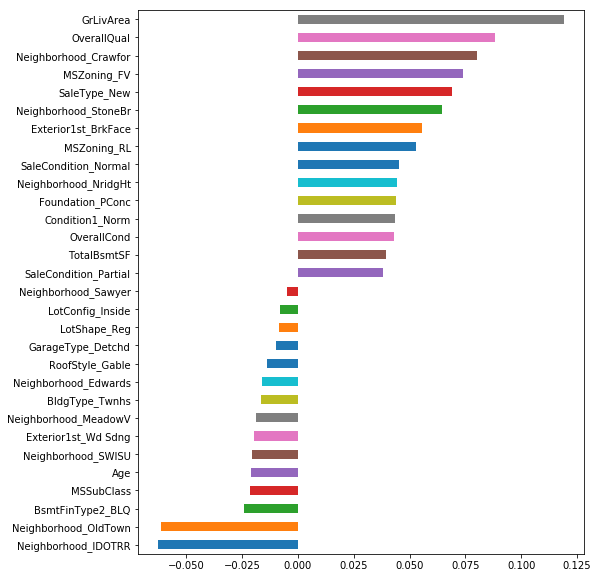

In [171]:
# Plot the top positive and negative coefs
imp_lasso_coefs = pd.concat([lasso_coefs.sort_values().head(15),lasso_coefs.sort_values().tail(15)])
plt.figure(figsize=(8,10))
imp_lasso_coefs.plot(kind='barh')

In [172]:
# Number of features set to zero
print(f"Number of feature set to zero after Lasso Regression: {lasso_coefs[lasso_coefs == 0].count()}")

Number of feature set to zero after Lasso Regression: 83


#### Features which positively affect Price are `GrLivArea, OverallQual, Neighbourhoods('Crawfor,StoneBr'), MSZoning(FV,RL), SaleTypeNew`

#### Features which negatively affect Price are `Neighbourhoods('IDOTrr,OldTown'), Brick common Exterior,  Below Average Basement Finishing, Age`

In [173]:
# Prediction on the model and check prediction metrics R2 score and Mean absolute error 
from sklearn.metrics import r2_score,mean_absolute_error

y_train_pred =  final_lasso.predict(X_train)
print(f"Test R2 score: {r2_score(y_train,y_train_pred)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_train,y_train_pred)}")
print('\n')
y_test_pred =  final_lasso.predict(X_test)
print(f"Test R2 score: {r2_score(y_test,y_test_pred)}")
print(f"Test mean_absolute_error: {mean_absolute_error(y_test,y_test_pred)}")

Test R2 score: 0.9262953563095286
Test mean_absolute_error: 0.07794987151983833


Test R2 score: 0.9033654289090753
Test mean_absolute_error: 0.08728721083487752


In [174]:
# Getting actual Sales value by reversing the log transformation by using antilog
final_saleprice = pd.DataFrame(np.exp(y_test_pred),y_test)
final_saleprice.reset_index(inplace=True)
final_saleprice.columns = ['Log_Sales','Actual_Final_SalePrice']
final_saleprice.head()

,Log_Sales,Actual_Final_SalePrice
0,12.660328,334728.217837
1,12.936752,361760.224320
2,11.872347,139637.507413
3,11.941944,129323.845494
4,12.301383,197544.921181


The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

### Final Observations

Taking into consideration the results of both Ridge and Lasso regression:-

The following variables affect the Sale prices of houses in positive way in decreasing order of relevance:-

- Overall Quality
- GrLivArea
- Neighbourhoods('Crawfor,StoneBr')
- MSZoning(FV,RL)
- Brick Face Exterior('Exterior1stBrkFace')

The following variables affect the Sale prices of houses in negative way in decreasing order of relevance:-

- Neighbourhoods('IDOTrr,OldTown')
- Below Average Basement Finishing
- Age of the property
